In [43]:
%cd ../../../data/round3/days/

/Users/IvanTang/quant/IMC_Prosperity3_GraniteFlow/data/round3/days


In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [44]:
df0 = pd.read_csv('day0.csv')
df1 = pd.read_csv('day1.csv')
df2 = pd.read_csv('day2.csv')


In [46]:
print(df0.columns)

Index(['Unnamed: 0', 'timestamp', 'VOLCANIC_ROCK',
       'VOLCANIC_ROCK_VOUCHER_9500', 'VOLCANIC_ROCK_VOUCHER_9750',
       'VOLCANIC_ROCK_VOUCHER_10000', 'VOLCANIC_ROCK_VOUCHER_10250',
       'VOLCANIC_ROCK_VOUCHER_10500', 'T', 'iv9500', 'iv9750', 'iv10000',
       'iv10250', 'iv10500', 'predicted_iv9500', 'fair_price9500',
       'predicted_iv9750', 'fair_price9750', 'predicted_iv10000',
       'fair_price10000', 'predicted_iv10250', 'fair_price10250',
       'predicted_iv10500', 'fair_price10500', 'delta9500', 'delta9750',
       'delta10000', 'delta10250', 'delta10500'],
      dtype='object')


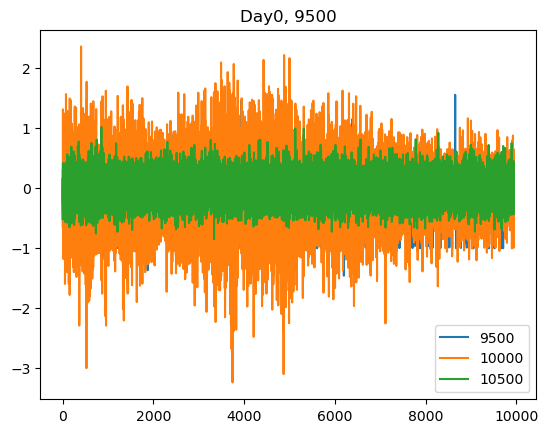

In [50]:
plt.title('Day0, 9500')
plt.plot(df0['delta9500'], label = '9500')
plt.plot(df0['delta10000'], label = '10000')
plt.plot(df0['delta10500'], label = '10500')

plt.legend()

In [ ]:
plt.plot(df0['delta9500'] - df0['delta10500'])